# Лабораторная работа №2.
Выполнила: студентка группы 9383, Сергиенкова Анастасия.

Цель: изучить и применить дискретное преобразование Фурье с помощью библиотек анализа речевых сигналов Python.

## Задачи:

1. Используя ДПФ построить траекторию основного фона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.
3. Постороить сонограмму по записи своего голоса.

#### Импортируем нужные библиотеки:

In [32]:
import audiofile as audiofile
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy.io import wavfile
from scipy import signal
from scipy.signal import spectrogram 
import IPython
import IPython.display as ipd
import more_itertools as mit

In [33]:
rate, signal = wavfile.read('audio.wav', "r")
time = np.linspace(0, len(signal) / rate, num = len(signal))

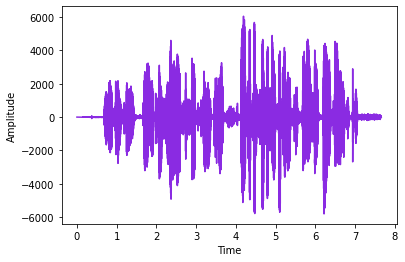

In [34]:
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(time, signal, color="blueviolet")

### Используя ДПФ построить траекторию основного фона (F0) на записи своего голоса:

In [35]:
N = 256

In [36]:
intervals = list(mit.windowed(signal,n=N, step=int(0.25*N)))
intervals[-1] = [i for i in intervals[-1] if i]
intervals = [i*np.hamming(len(i)) for i in intervals]

In [37]:
def DFT(x):
    n = np.arange(len(x), dtype=float)
    k = n.reshape(len(x), 1)
    e = np.exp(-2j*np.pi*k*n/N)
    return (np.dot(e, x))

dft_int = [DFT(i) for i in intervals]

In [38]:
amp_spectr = [(sum([j**2 for j in i[:int(len(i)/2)]])**0.5).real for i in dft_int]

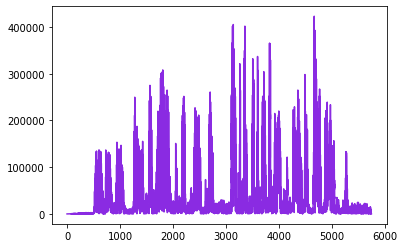

In [39]:
plt.plot(amp_spectr, color="blueviolet")

### Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.:

In [40]:
def foo(a_s, s_r):
    for i in range(0, len(a_s), s_r):
        yield a_s[i:i + s_r]

spectr_res = round(rate/N)
f0 = []
for i in foo(amp_spectr, spectr_res):
    seg = np.array(i)
    if seg.max() > 3*seg.mean():
        f0 += seg.tolist()
    else:
        f0 += [0 for i in range(len(seg))]

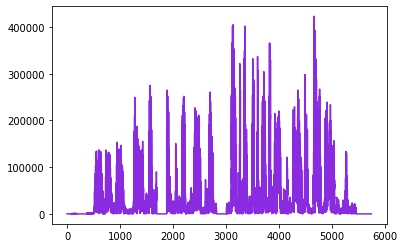

In [41]:
plt.plot(f0, color="blueviolet")

### Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса:

Вторая формантная частота


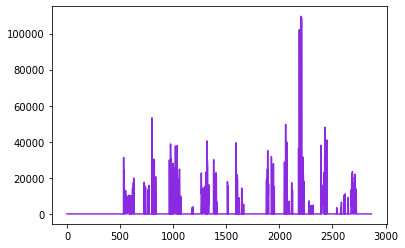

In [42]:
print("Вторая формантная частота")

f1 = []
i = 1
while i < round(len(f0)/2)-1:
    _max = max([f0[2*i-1], f0[2*i], f0[2*i+1]])
    if f0[i] > 2*_max:
        f1 += [_max]
    else:
        f1 += [0]
    i += 1
plt.plot(f1, color="blueviolet")

Третья формантная частота


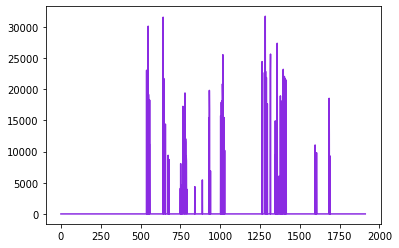

In [43]:
print("Третья формантная частота")

f2 = []
i = 1
while i < round(len(f0)/3)-1:
    _max = max([f0[3*i-1], f0[3*i], f0[3*i+1]])
    if f0[i] > 4*_max:
        f2 += [_max]
    else:
        f2 += [0]
    i += 1
plt.plot(f2, color="blueviolet")

Четвертая формантная частота


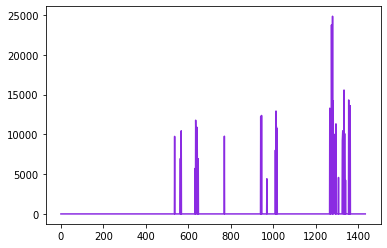

In [44]:
print("Четвертая формантная частота")

f3 = []
i = 1
while i < round(len(f0)/4)-1:
    _max = max([f0[4*i-1], f0[4*i], f0[4*i+1]])
    if f0[i] > 8*_max:
        f3 += [_max]
    else:
        f3 += [0]
    i += 1
plt.plot(f3, color="blueviolet")

### Построение сонограммы:

/Users/ramka178rus/opt/miniconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


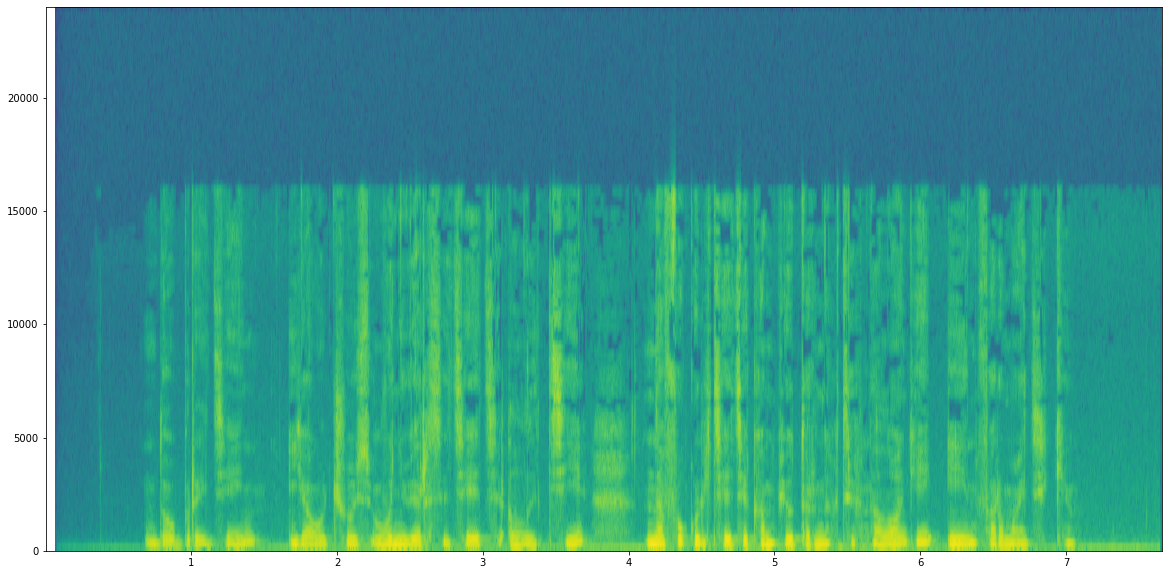

In [45]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.specgram(signal,NFFT=N, pad_to=N, Fs=rate)
plt.show()

### Выводы:
С помощью библиотек языка программирования Python была построена траектория основного тона, так же были построены траектории второй, третьей и четвертой формантных частот, и была построена сонограмма.